# Análise de Filmes Exibidos no Brasil de 2009 a 2019
Com base nos dados da Ancine (http://oca.ancine.gov.br)

In [1]:
# importando as bibliotecas
import pandas as pd
# Informar o matplotlib sobre gráficos inline
%matplotlib inline
# Carregar o arquivo, pulando as duas primeiras linhas (skiprows)
df = pd.read_excel ( 'Filme_exibidos.xlsx', skiprows=2, skipfooter=19 )
# Exibindo as 5 primeiras linhas
df.head()

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
0,2009,semana 01,E1402431200000,007 Quantum of Solace,Ficção,"Estados Unidos, Inglaterra",Estrangeira,2008-11-07 00:00:00,Sony,Distribuição Internacional,31,4597,24719.0
1,2009,semana 01,B0700678800000,5 Frações de uma Quase História,Ficção,Brasil,Brasileira,2008-05-09 00:00:00,Usina Digital,Distribuição Nacional,1,24,120.5
2,2009,semana 01,E1600541500000,A Alegria de Emma,Ficção,Alemanha,Estrangeira,2008-10-03 00:00:00,Pandora Filmes,Distribuição Nacional,1,42,700.0
3,2009,semana 01,E1600594000000,A Bela Junie,Ficção,França,Estrangeira,2009-01-01 00:00:00,Imovision,Distribuição Nacional,2,1331,15710.5
4,2009,semana 01,E1600127600000,A Casa das Coelhinhas,Ficção,Estados Unidos,Estrangeira,2008-10-10 00:00:00,Sony,Distribuição Internacional,4,402,2011.0


In [2]:
# Exibindo as 5 últimas linhas
df.tail()

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
61129,2019,semana 52,E1900431700000,Um Amante Francês,Ficção,França,Estrangeira,2019-11-28 00:00:00,Pagu Pictures,Distribuição Nacional,1,44,434.0
61130,2019,semana 52,E1900466900000,Um Dia De Chuva Em Nova York,Ficção,Estados Unidos,Estrangeira,2019-11-21 00:00:00,Imagem,Distribuição Nacional,12,2662,57290.0
61131,2019,semana 52,B1800552500000,Um Dia Para Susana,Documentário,Brasil,Brasileira,2019-10-03 00:00:00,Vitrine Filmes,Distribuição Nacional,1,12,36.0
61132,2019,semana 52,B1900177100000,Uma,Documentário,"Brasil, Índia",Brasileira,2019-11-21 00:00:00,Espaço Filmes,Distribuição Nacional,2,73,1345.0
61133,2019,semana 52,E1900436800000,Uma Segunda Chance Para Amar,Ficção,"Estados Unidos, Reino Unido",Estrangeira,2019-11-28 00:00:00,Universal,Distribuição Internacional,32,2572,41975.0


In [3]:
# Verificar todos os tipos de coluna
df.dtypes

Ano de exibição                          int64
Semana de exibição                      object
CPB/ROE                                 object
Título da obra                          object
Gênero                                  object
País(es) produtor(es) da obra           object
Nacionalidade da obra                   object
Data de Lançamento                      object
Distribuidora                           object
Origem da empresa distribuidora         object
Número de salas na semana dos dados      int64
Público na semana dos dados              int64
Renda (R$) na semana dos dados         float64
dtype: object

In [4]:
 # Converter o campo Data de Lançamento em data
df['Data de Lançamento'] = pd.to_datetime(df['Data de Lançamento'])

ParserError: Unknown string format: Relançamento

In [5]:
# Identificar problema na coluna Data de Lançamento
df['Data de Lançamento'].value_counts()

Relançamento           649
2014-10-23 00:00:00    250
2012-12-21 00:00:00    233
2015-08-20 00:00:00    198
2009-06-05 00:00:00    198
                      ... 
2005-10-07 00:00:00      1
2015-06-07 00:00:00      1
relançamento             1
2009-09-22 00:00:00      1
2017-03-29 00:00:00      1
Name: Data de Lançamento, Length: 879, dtype: int64

In [6]:
# Exibir alguns filmes que estão com Relançamento no Campo Data de Lançamento
df [ df['Data de Lançamento'] == 'Relançamento' ].head()

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
519,2009,semana 05,E1600589800000,Os Contos de Canterbury,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,1,886,6758.5
636,2009,semana 06,E1600589800000,Os Contos de Canterbury,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,1,707,4378.0
746,2009,semana 07,E1600589800000,Os Contos de Canterbury,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,1,432,2765.5
847,2009,semana 08,E1600589800000,Os Contos de Canterbury,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,1,473,2990.5
956,2009,semana 09,E1600589800000,Os Contos de Canterbury,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,1,281,1800.5


## Decisão sobre dados incorretos/faltantes/divergentes

In [7]:
df.shape

(61134, 13)

In [8]:
# Criar um novo DataFrame sem os relançamentos
df_novo = df [( df['Data de Lançamento'] != 'Relançamento') &
              ( df['Data de Lançamento'] != 'relançamento')].copy()

In [9]:
# Verificar todos os tipos de coluna
df_novo.dtypes

Ano de exibição                          int64
Semana de exibição                      object
CPB/ROE                                 object
Título da obra                          object
Gênero                                  object
País(es) produtor(es) da obra           object
Nacionalidade da obra                   object
Data de Lançamento                      object
Distribuidora                           object
Origem da empresa distribuidora         object
Número de salas na semana dos dados      int64
Público na semana dos dados              int64
Renda (R$) na semana dos dados         float64
dtype: object

In [10]:
 # Converter o campo Data de Lançamento em data
df_novo['Data de Lançamento'] = pd.to_datetime(df_novo['Data de Lançamento'])

In [11]:
df_novo.dtypes

Ano de exibição                                 int64
Semana de exibição                             object
CPB/ROE                                        object
Título da obra                                 object
Gênero                                         object
País(es) produtor(es) da obra                  object
Nacionalidade da obra                          object
Data de Lançamento                     datetime64[ns]
Distribuidora                                  object
Origem da empresa distribuidora                object
Número de salas na semana dos dados             int64
Público na semana dos dados                     int64
Renda (R$) na semana dos dados                float64
dtype: object

In [12]:
# Quais anos tiveram mais filmes lançados?
df_novo['Data de Lançamento'].dt.year.value_counts()

2013    5957
2009    5822
2014    5733
2011    5669
2010    5484
2017    5354
2012    5313
2015    5298
2018    4996
2016    4929
2019    3744
2008    1536
2007     341
2006     163
2005      55
2001      22
2004      19
2002      13
1999      10
2020       9
2003       6
1998       5
2000       4
1987       1
1978       1
Name: Data de Lançamento, dtype: int64

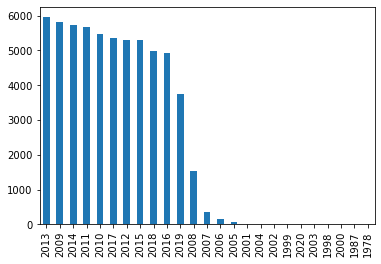

In [13]:
# Plotar os gráficos dos filmes lançados?
df_novo['Data de Lançamento'].dt.year.value_counts().plot.bar()

In [14]:
Qual o filmes tiveram maior bilheteria?
df_novo.nlargest ( 10 ,'Renda (R$) na semana dos dados' )

Object `bilheteria` not found.


,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
58087,2019,semana 17,E1900107800000,Vingadores: Ultimato,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,3139,9098740,161351954.0
52787,2018,semana 18,E1800067100000,VINGADORES: GUERRA INFINITA,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,2354,6603711,111363840.0
59027,2019,semana 29,E1900267700000,O Rei Leão,Ficção,Estados Unidos,Estrangeira,2019-07-18,Disney,Distribuição Internacional,2305,6502140,109037513.0
58162,2019,semana 18,E1900107800000,Vingadores: Ultimato,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,2918,5323258,90058536.0
59086,2019,semana 30,E1900267700000,O Rei Leão,Ficção,Estados Unidos,Estrangeira,2019-07-18,Disney,Distribuição Internacional,2270,4382106,72023724.0
57359,2019,semana 10,E1900011200000,Capitã Marvel,Ficção,Estados Unidos,Estrangeira,2019-03-07,Disney,Distribuição Internacional,2271,3965041,65473851.0
52900,2018,semana 19,E1800067100000,VINGADORES: GUERRA INFINITA,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,2161,3813080,61740651.0
42138,2016,semana 17,E1600129800000,Capitão América: Guerra civil,Ficção,Estados Unidos,Estrangeira,2016-04-28,Disney,Distribuição Internacional,1635,4074628,61046213.0
41584,2016,semana 12,E1600053700000,Batman vs Superman: A Origem da Justiça,Ficção,Estados Unidos,Estrangeira,2016-03-24,Warner,Distribuição Internacional,1440,3440203,53291351.0
47356,2017,semana 15,E1700045600000,Velozes e Furiosos 8,Ficção,Estados Unidos,Estrangeira,2017-04-13,Universal,Distribuição Internacional,1544,3316094,52643910.0


In [15]:
Qual o filmes tiveram menor bilheteria?
df_novo.nsmallest ( 10 ,'Renda (R$) na semana dos dados' )

Object `bilheteria` not found.


,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
355,2009,semana 04,B0800900900000,Bezerra de Menezes - O Diário de um Espírito,Ficção,Brasil,Brasileira,2008-08-29,Fox,Distribuição Internacional,1,8400,0.0
462,2009,semana 05,B0800900900000,Bezerra de Menezes - O Diário de um Espírito,Ficção,Brasil,Brasileira,2008-08-29,Fox,Distribuição Internacional,1,8400,0.0
1335,2009,semana 12,Sem CPB,"Vamos Subir, Leão",Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,0,0,0.0
1370,2009,semana 13,B0900969800000,Contratempo - Uma Valsa da Dor,Documentário,Brasil,Brasileira,2009-02-13,Videofilmes,Distribuição Nacional,1,0,0.0
1693,2009,semana 15,B0700739200000,Santiago,Documentário,Brasil,Brasileira,2007-08-24,Videofilmes,Distribuição Nacional,1,0,0.0
1706,2009,semana 15,E1600635000000,Tony Manero,Ficção,Chile,Estrangeira,2009-04-10,Imovision,Distribuição Nacional,0,0,0.0
1914,2009,semana 17,B0800936700000,Fumando Espero,Documentário,Brasil,Brasileira,2009-04-24,Gávea Filmes e Produções,Distribuição Nacional,0,0,0.0
2908,2009,semana 25,E1600598400000,As Chaves de Casa,Ficção,Itália,Estrangeira,2006-01-06,Filmes do Estação,Distribuição Nacional,1,0,0.0
3028,2009,semana 26,E1600598400000,As Chaves de Casa,Ficção,Itália,Estrangeira,2006-01-06,Filmes do Estação,Distribuição Nacional,1,0,0.0
3387,2009,semana 29,E1600550800000,Estamos Bem Mesmo sem Você,Ficção,Itália,Estrangeira,2007-12-25,Filmes do Estação,Distribuição Nacional,1,0,0.0


In [16]:
# Quantos filmes são brasileiros e estrangeiros?
df_novo['Nacionalidade da obra'].value_counts()

Estrangeira    44550
Brasileira     15934
Name: Nacionalidade da obra, dtype: int64

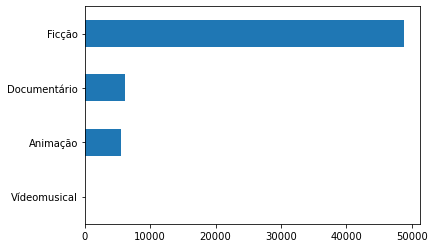

In [17]:
# Qual a distribuição de filmes por gênero?
df_novo['Gênero'].value_counts(ascending=True).plot.barh()